# Importing liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
from keras.models import load_model

In [3]:
path=r'C:\Users\sahoo\Desktop\Models\Digit Recognizer'
tr=pd.read_csv(path+"/train.csv")
tr

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
feature=tr.drop('label',axis=1)
feature

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
a=np.array(feature.iloc[41999,:])

In [8]:
features=[]
for i in range(len(tr)):
    features.append(np.array(feature.iloc[i,:]))

In [9]:
print(tr['label'].unique()) #unique classes
label=tr['label']
label=np.array(label)
label

[1 0 4 7 3 5 8 9 2 6]


array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [15]:
features[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  18,  30, 137, 137, 192,  86,  72,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  13,  86, 250, 254, 254, 254, 254, 217,
       246, 151,  32,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  16, 179, 254, 254, 254, 25

# Convert raw data to image data

In [16]:
def resizeimg(img):
    img=np.reshape(img,(28,28,1))
    img=img/255.0
    return img
features=np.array(list(map(resizeimg,features)))

# Print Sample image

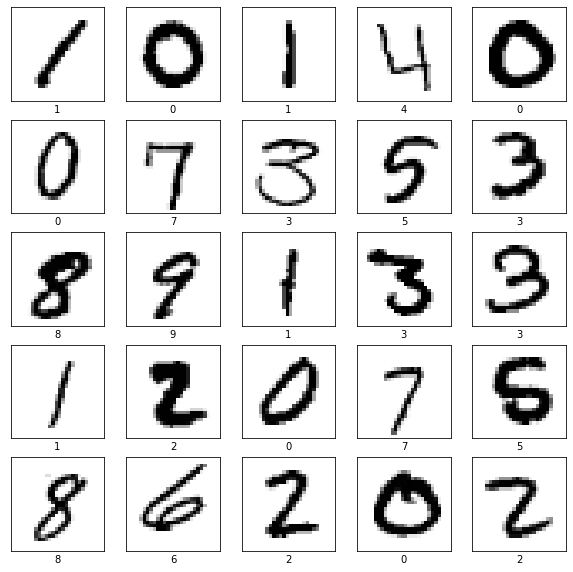

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

# Splitting the dataset

In [18]:
x_train,x_test,y_train,y_test=train_test_split(features, label, random_state=0, test_size=0.25)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31500, 28, 28, 1)
(10500, 28, 28, 1)
(31500,)
(10500,)


# Model Building

In [32]:
model= Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten(input_shape=x_train.shape[1:]))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(tr['label'].unique()), activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy',metrics=['accuracy'],optimizer='Adam')

model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=32,
          verbose=1,
          validation_data=(x_test,y_test))

Epoch 1/20
985/985 [==============================] - 51s 52ms/step - loss: 0.2399 - accuracy: 0.9232 - val_loss: 0.0894 - val_accuracy: 0.9722
Epoch 2/20
985/985 [==============================] - 54s 55ms/step - loss: 0.0630 - accuracy: 0.9810 - val_loss: 0.0588 - val_accuracy: 0.9831
Epoch 3/20
985/985 [==============================] - 54s 55ms/step - loss: 0.0426 - accuracy: 0.9867 - val_loss: 0.0497 - val_accuracy: 0.9856
Epoch 4/20
985/985 [==============================] - 54s 54ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0613 - val_accuracy: 0.9814
Epoch 5/20
985/985 [==============================] - 54s 55ms/step - loss: 0.0305 - accuracy: 0.9902 - val_loss: 0.0484 - val_accuracy: 0.9870
Epoch 6/20
985/985 [==============================] - 54s 55ms/step - loss: 0.0219 - accuracy: 0.9932 - val_loss: 0.0556 - val_accuracy: 0.9843
Epoch 7/20
985/985 [==============================] - 54s 55ms/step - loss: 0.0234 - accuracy: 0.9929 - val_loss: 0.0438 - val_accuracy:

In [95]:
print(model.summary())

pred=model.predict(x_test)
y_pred=[]
for i in range(len(pred)):
    y_pred.append(np.argmax(pred[i]))

print(confusion_matrix(y_test, y_pred))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 9, 9, 128)         147584    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 2, 2, 64)          73792     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 1, 1, 64)        

In [109]:
#model.save(path+"/digit_classifier.h5")
mymodel=load_model(path+"/digit_classifier.h5")
mymodel

# Let's predict with the new data

In [35]:
test_data=pd.read_csv(path+"/test.csv")
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
new_features=[]
for i in range(len(test_data)):
    new_features.append(np.array(test_data.iloc[i,:]))

new_features=np.array(list(map(resizeimg,new_features)))

new_prediction=model.predict(new_features)

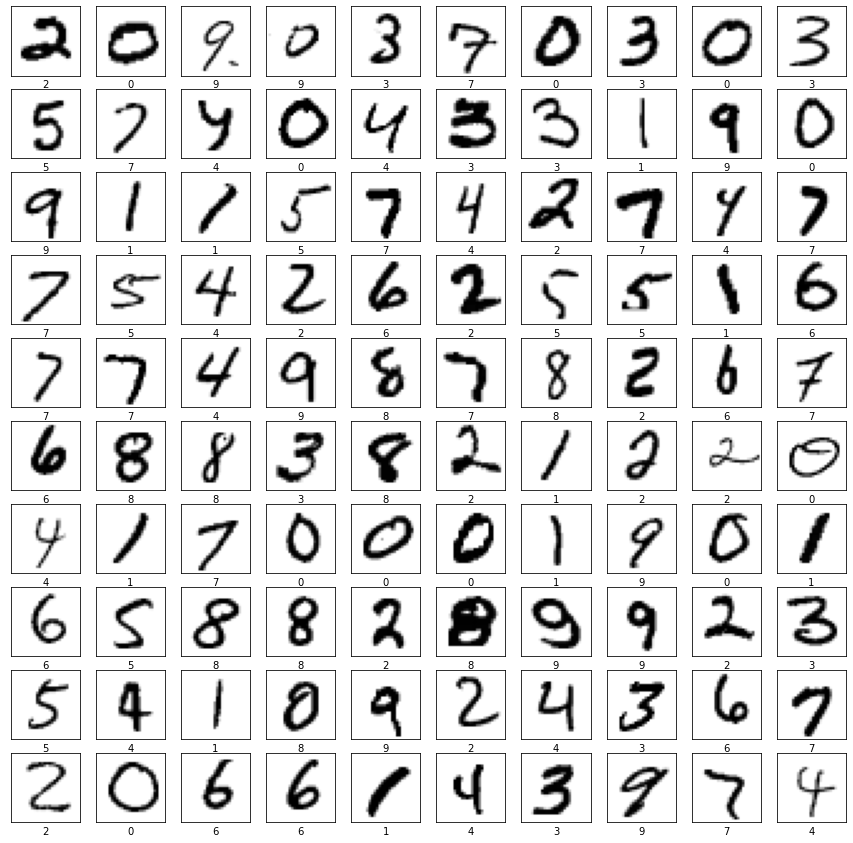

In [78]:
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(new_features[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(new_prediction[i]))
plt.show()

In [79]:
final_pred=[]
for i in range(len(new_prediction)):
    final_pred.append(np.argmax(new_prediction[i]))

In [99]:
frame=pd.DataFrame()
frame['ImageId']=list(range(1,28001))
frame['Label']=final_pred
frame

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [101]:
frame.to_csv(path+'/final_prediction.csv')